# Овошје

Целта на оваа лабораториска вежба е да се запознаете со процедурата за тренирање и тестирање на способноста на алгоритам од областа на машинското учење. Примерот е за дрва за одлучување, користејќи ја библиотеката [scikit-learn](https://scikit-learn.org/stable/index.html).

Разгледуваме множество податоци за овошје и зеленчук. Целта е да умееме да разликуваме овошје од зеленчук имајќи го предвид хранливиот состав на производот. Податоците со кои располагаме се дадени во табелата подолу.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/fruits_train.csv')
df

,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g),classification
0,1.0,7.0,0.0,0.0,1.0,52.0,107.0,0.3,2.4,fruit
1,38.0,16.0,1.0,2.0,2.0,48.0,259.0,1.4,2.0,fruit
2,2.0,16.0,1.0,3.0,7.0,160.0,485.0,2.0,7.0,fruit
3,1.0,14.0,0.0,1.0,6.0,89.0,358.0,1.1,2.6,fruit
4,0.0,8.0,1.0,1.0,5.0,43.0,325.0,1.6,2.8,vegetable
5,4.0,35.0,2.0,3.0,5.0,43.0,163.0,1.4,5.0,fruit
6,1.0,16.0,0.0,1.0,1.0,57.0,77.0,0.7,2.4,fruit
7,12.0,148.0,4.0,3.0,5.0,34.0,316.0,2.8,2.6,vegetable
8,15.0,141.0,4.0,7.0,5.0,43.0,389.0,3.4,3.8,vegetable
9,334.0,9.0,3.0,1.0,3.0,41.0,320.0,0.9,2.8,vegetable


Поделете го податочното множество на два дела. Поголемиот дел нека е 70% и ќе служи за тренирање, а помалиот дел од 30% ќе служи за проверка на повединието на алгоритмите кои ќе ги имплементирате понатаму.

In [5]:
df_y = df['classification']
df_x = df.iloc[:, :-1]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=155)
df_test_x

,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g)
27,170.0,15.0,2.0,4.0,3.0,26.0,340.0,1.0,0.5
31,13.0,44.0,3.0,1.0,3.0,53.0,166.0,0.8,1.8
18,0.0,88.0,2.0,3.0,2.0,29.0,138.0,1.1,2.8
0,1.0,7.0,0.0,0.0,1.0,52.0,107.0,0.3,2.4
17,33.0,20.0,5.0,11.0,7.0,61.0,180.0,1.5,1.8
28,187.0,46.0,9.0,15.0,19.0,23.0,558.0,2.9,2.2
2,2.0,16.0,1.0,3.0,7.0,160.0,485.0,2.0,7.0
29,0.0,97.0,1.0,2.0,3.0,33.0,153.0,0.7,2.0
14,0.0,3.0,0.0,1.0,3.0,25.0,229.0,1.0,3.0
16,2.0,6.0,1.0,1.0,1.0,67.0,191.0,0.6,0.9


Исцртајте ги на график производите така што на x и y оските ќе бидат податоците за витамините, а производите ќе бидат претставени со боја или симбол.

**Совет**: За помош може да го искористите третиот пример `Setting size and color with column names` од [документацијата](https://plotly.com/python/line-and-scatter/) на плотли.

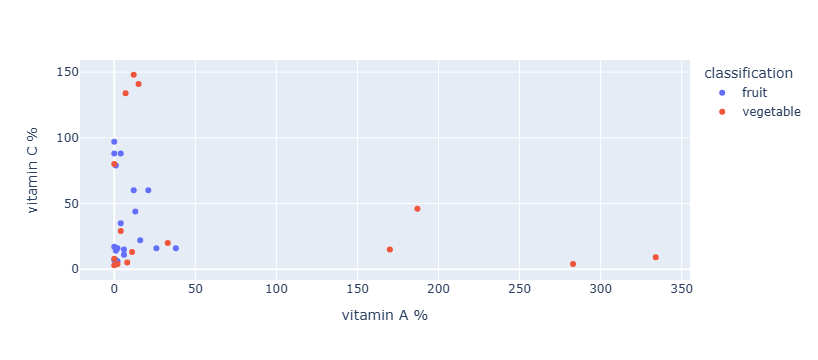

In [8]:
import plotly.express as px
px.scatter(df, x="vitamin A %", y="vitamin C %", color="classification")

Користејќи ја библиотеката `sklearn`,  вчитајте класификатор - дрво за одлучување, претставен преку класата `DecisionTreeClassifier`, а потоа вметнете ги податоците за тренирање од вториот чекор за да ја истренирате мрежата.

- [Пример за дрва за одлучување од sklearn](https://scikit-learn.org/stable/modules/tree.html)
- [Документација за Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(df_train_x, df_train_y)

NameError: name 'df_train_x' is not defined

Пресметајте ја прецизноста на алгоритамот за податоците кои тој ги нема видено (на кои нема тренирано). Потоа пресметајте ја прецизноста на алгоритамот за податоците кои ги има видено (на кои има тренирано). Споредете ги резултатите. Ви изгледаат ли во ред?

In [13]:
df_pred_y = clf.predict(df_test_x)
df_pred_y

array(['vegetable', 'fruit', 'vegetable', 'fruit', 'fruit', 'vegetable',
       'fruit', 'vegetable', 'fruit', 'fruit', 'vegetable'], dtype=object)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(df_test_y, df_pred_y)

0.6363636363636364

In [15]:
accuracy_score(df_train_y, clf.predict(df_train_x))

1.0

Кои производи алгоритамот успева да ги распознава подобро, висококалоричните (над 50 калории) или нискокалоричните (под 50 калории)?

In [16]:
df_high_calorie = df[df['calories (per 100g)'] > 50]
df_low_calorie = df[df['calories (per 100g)'] <= 50]
df_high_calorie

,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g),classification
0,1.0,7.0,0.0,0.0,1.0,52.0,107.0,0.3,2.4,fruit
2,2.0,16.0,1.0,3.0,7.0,160.0,485.0,2.0,7.0,fruit
3,1.0,14.0,0.0,1.0,6.0,89.0,358.0,1.1,2.6,fruit
6,1.0,16.0,0.0,1.0,1.0,57.0,77.0,0.7,2.4,fruit
15,12.0,60.0,3.0,8.0,1.0,73.0,280.0,0.7,7.0,fruit
16,2.0,6.0,1.0,1.0,1.0,67.0,191.0,0.6,0.9,fruit
17,33.0,20.0,5.0,11.0,7.0,61.0,180.0,1.5,1.8,vegetable
19,21.0,60.0,1.0,1.0,2.0,60.0,168.0,0.8,1.6,fruit
23,0.0,7.0,0.0,1.0,1.0,57.0,116.0,0.4,3.1,fruit
26,0.0,17.0,1.0,1.0,3.0,83.0,236.0,1.7,4.0,fruit


In [17]:
df_high_calorie_y = df_high_calorie['classification']
df_high_calorie_x = df_high_calorie.iloc[:, :-1]
accuracy_score(df_high_calorie_y, clf.predict(df_high_calorie_x))

0.9166666666666666

In [18]:
df_low_calorie_y = df_low_calorie['classification']
df_low_calorie_x = df_low_calorie.iloc[:, :-1]
accuracy_score(df_low_calorie_y, clf.predict(df_low_calorie_x))

0.8695652173913043

Какви производи се редовите од податочното множество од датотеката `fruits_test.csv`?

In [19]:
df_new = pd.read_csv('data/fruits_test.csv')
df_new

,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g)
0,1.0,154.0,3.0,1.0,4.0,61.0,213.0,1.1,3.0
1,15.0,300.0,2.0,11.0,3.0,20.0,202.0,2.2,2.1
2,0.0,43.0,2.0,3.0,5.0,53.0,151.0,1.1,7.0


In [16]:
clf.predict(df_new)

array(['fruit', 'fruit', 'fruit'], dtype=object)